In [6]:
# Example python program to read data from a PostgreSQL table

# and load into a pandas DataFrame

import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import requests
from skill_corner.season_schedule import season
%load_ext autotime
%timeit

In [1]:
#### Importing libraries ####
import matplotlib.image as mpimg
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
from PIL import Image
import requests
from io import BytesIO
from highlight_text import htext
from matplotlib.font_manager import FontProperties

In [8]:
### Read the dataframe ###

df=pd.read_csv(r'C:\Users\Home\Documents\Player Aggregates\All_players.csv', index_col=None)

## Getting the Player Column towards the end ##
df.index = df['Player']

### Delete the unnecessary columns ###
df.drop(['Minutes', 'Unnamed: 0','Player','Player_Type'], axis=1, inplace=True)

###
summ_cols=['Distance','Running Distance','HSR Distance','Sprinting Distance',
           'Count HSR','Count Sprint','Count Acceleration','Count Deceleration','PSV-99']

## Keep the metrics ###
df=df[summ_cols]

## Finding mean decile by position

for col in summ_cols:
    df[col] = pd.qcut(df[col], 10, labels=False)
    
df

Distance  Running Distance  HSR Distance  Sprinting Distance  \
Player                                                                       
L. Gugganig          2                 2             0                   0   
R. Lindgren          2                 0             0                   0   
S. Willems           4                 2             1                   0   
B. Alves             9                 9             5                   0   
P. Stenzel           8                 9             8                   0   
...                ...               ...           ...                 ...   
T. Mings             4                 6             8                   9   
E.J. Yamiq           5                 3             3                   8   
K. Djidji            8                 7             7                   9   
L. Kone              0                 1             2                   9   
A. Dijksteel         1                 3             7                   9   

              Count HSR  Count Sprint  Count Acceleration  Count Deceleration  \
Player                                                                          
L. Gugganig           0             0                   1                   0   
R. Lindgren           0             0                   0                   0   
S. Willems            2             0                   1                   5   
B. Alves              5             0                   8                   7   
P. Stenzel            8             0                   7                   5   
...                 ...           ...                 ...                 ...   
T. Mings              7             9                   6                   8   
E.J. Yamiq            3             7                   2                   4   
K. Djidji             6             9                   8                   8   
L. Kone               5             8                   5                   4   
A. Dijksteel          7             9                   8                   8   

              PSV-99  
Player                
L. Gugganig        0  
R. Lindgren        0  
S. Willems         0  
B. Alves           0  
P. Stenzel         0  
...              ...  
T. Mings           9  
E.J. Yamiq         9  
K. Djidji          9  
L. Kone            9  
A. Dijksteel       9  

[1238 rows x 9 columns]

In [4]:
final_df

Player              R. Semedo (EUR)
Distance                          4
Running Distance                  4
HSR Distance                      3
Sprinting Distance                1
Count HSR                         3
Count Sprint                      2
Count Acceleration                8
Count Deceleration                8
PSV-99                            0

In [56]:
### So here's where you subset the data ###

Median = df1.median(axis=1)
Median

Distance                   4.5
Running Distance           4.5
HSR Distance               4.5
Sprinting Distance         4.5
Count HSR                  4.5
Count Sprint               4.5
Count Acceleration         4.5
Count Deceleration         4.5
Minutes TIP                4.5
Distance TIP               4.5
Running Distance TIP       4.5
HSR Distance TIP           4.5
Sprinting Distance TIP     4.5
Count HSR TIP              4.5
Count Sprint TIP           4.5
Count Acceleration TIP     4.5
Count Deceleration TIP     4.5
Minutes OTIP               4.5
Distance OTIP              4.5
Running Distance OTIP      4.5
HSR Distance OTIP          4.5
Sprinting Distance OTIP    4.5
Count HSR OTIP             4.5
Count Sprint OTIP          4.5
Count Acceleration OTIP    4.5
Count Deceleration OTIP    4.5
HIDistance                 4.5
HI Count                   4.5
Mmin                       4.5
HI Mmin                    4.5
HI Distance TIP            4.5
HI Count TIP               4.5
MMin TIP

time: 10.5 ms


In [2]:
import psycopg2 as pg
import pandas.io.sql as psql
connection = pg.connect("host=localhost dbname=postgres user=vjayanth password=Kaamini_702")
All_Players = psql.read_sql('SELECT * FROM All_League_Players', connection)

time: 150 ms


In [3]:
All_Players = pd.read_csv(r'C:\Users\Home\Documents\Skill Corner\All_leagues_Players.csv')

time: 1.93 s


In [17]:
### Getting Date in the correct Format ###

def subset_data(All_leagues_Players):

    All_leagues_Players['date'] = pd.to_datetime(All_leagues_Players['date'], format='%Y-%m-%d')
    All_leagues_Players['Date'] = All_leagues_Players['date'].dt.strftime('%b-%y')
    

    #### Calling the season schedule class ####
    g=season()
    season_schedule=g.season_schedule()
    #season_schedule['id']=season_schedule['id'].astype(str)

    COMPETITIONS = {
        "ENG Premier League": 1, "FRA Ligue 1": 3, "GER Bundesliga": 6, "GER Bundesliga 2": 40, "FRA Ligue 2": 12, "ESP La Liga": 4,
        "ESP La Liga 2": 42, "ENG Championship": 31, "DEN Superliga": 89, "BRA Serie A": 77, "AUT Bundesliga": 88, 
        "BEL Jupiler Pro League": 16, "GRE Super League": 28, "ITA Serie A": 5, "ITA Serie B": 41, "NED Eredivisie": 17,
        "POL Ekstraklasa": 43, "POR Primeira Liga": 25, "RUS Premier League": 27, "SWE Allsvenskan": 90, "TUR Super Lig": 29,
        "UEFA Champions League": 10, "UEFA Europa League": 9, "SCO Premiership": 18, "SUI Super League": 82,"ARG Superliga": 70,
        "COPA Libertadores": 109,"COPA Sudamericana": 110,"CZE First League": 94,"CRO HNL": 93,"UKR Premier League": 26,
        "MLS US Soccer": 60}

    comps=pd.DataFrame(COMPETITIONS.items(), columns=['League', 'League_Id'])
    All_leagues_Players=pd.merge(All_leagues_Players,season_schedule,on=['id'],how='left')
    All_leagues_Players=pd.merge(All_leagues_Players,comps,on='League_Id',how='left')        
   

    All_leagues_Players.drop(['League_Id','player_id','date','player_birthdate', 'match_id', 'team_id','team'], axis=1, inplace=True)
    All_leagues_Players=All_leagues_Players.rename({'player_name': 'Player', 'match_name': 'Match',
                                                    'position': 'Position','team_name': 'Team',
                                                   'group':'Position Group'}, axis=1)  # new method
    
    #### Incorporate Position Groups #####
    POSITION_GROUPS = {
    "Center Back" : ["RCB", "LCB", "CB"],
    "Wing Back": ["LWB", "RWB"],
    "Center Midfield": ["RM", "LM", "CM"],
    "Defensive Midfield": "DM",
    "Attacking Midfield":"AM",
    "Winger": ["LW", "RW"],
    "Wide Forward":["LF", "RF"],
    "Center Forward": ["CF"]
    }


    Pos_df= pd.json_normalize(POSITION_GROUPS).T
    Pos_df.rename({0: 'Position'}, axis=1, inplace=True)
    Pos_df=Pos_df.explode('Position')
    Pos_df['position_group']=Pos_df.index
    Pos_df=Pos_df.reset_index(drop=True)

    
    All_leagues_Players=pd.merge(All_leagues_Players,Pos_df,on='Position',how='left')
    All_leagues_Players=All_leagues_Players[['Player','Team','Match','Season', 'League', 'Position Group','Date','Count Sprint TIP', 'Count Sprint',
       'Count Deceleration', 'Count Deceleration TIP', 'Count Sprint OTIP','Running Distance', 'HSR Distance', 'HSR Distance OTIP',
       'Sprinting Distance TIP', 'Count HSR', 'Distance TIP','Sprinting Distance OTIP', 'Count Acceleration', 'Minutes',
       'Count Deceleration OTIP', 'HSR Distance TIP', 'Distance','Count HSR OTIP', 'Minutes OTIP', 'Running Distance OTIP',
       'Minutes TIP', 'Sprinting Distance', 'Count Acceleration TIP', 'PSV-99','Count Acceleration OTIP', 'Running Distance TIP', 'Count HSR TIP',
       'Distance OTIP']]    
    

    return All_leagues_Players

time: 3.99 ms


In [18]:
All_leagues_Players=subset_data(All_Players)

time: 8.14 s


In [163]:
#### Primary Player_1 ####

Player_Name="Islam Slimani"
Position=""
Season='2020-2021'
League=""
Position_Group="Center Forward"
Team=""
Type_of_Player='Target'
Min_Games=10
Min_Game_Time=0

#### Primary _1
primary_1 = Player_Name
prim_pos_1= Position
prim_lg_1=League
prim_seasn_1=Season
prim_posgrp_1= Position_Group
prim_team_1=Team

 
filtered_cols=[]


filters={'Player':primary_1,
         'Season': prim_seasn_1,
         'League':prim_lg_1,
         'Position':prim_pos_1,
         'Team':prim_team_1,
         'Position Group':prim_posgrp_1}

A=All_leagues_Players

for key,value in filters.items():
    
    if value in list(A[key]):
        
        A=A.loc[(A[key] == value)]

Primary_1=A.copy()

cols = ['Player','Minutes', 'Distance', 'Running Distance', 'HSR Distance',
   'Sprinting Distance', 'Count HSR', 'Count Sprint', 'Count Acceleration',
   'Count Deceleration', 'PSV-99', 'Minutes TIP', 'Distance TIP',
   'Running Distance TIP', 'HSR Distance TIP', 'Sprinting Distance TIP',
   'Count HSR TIP', 'Count Sprint TIP', 'Count Acceleration TIP',
   'Count Deceleration TIP', 'Minutes OTIP', 'Distance OTIP',
   'Running Distance OTIP', 'HSR Distance OTIP', 'Sprinting Distance OTIP',
   'Count HSR OTIP', 'Count Sprint OTIP', 'Count Acceleration OTIP',
   'Count Deceleration OTIP']


### Subsetting Data for Minutes ###
Primary_1=Primary_1[(Primary_1['Minutes']>=Min_Game_Time)]

#### Check Match Count ####
Match_count=Primary_1['Match'].value_counts().sum()

print('The Player has played: '+str(Match_count)+ ' matches')

#### Binning for Minutes ####

bins = [0,30,45,60,90,130]
    
labels = ["0-30","30-45","45-60","60-90","90-120"]
Primary_1['Minute_Bins']= pd.cut(Primary_1['Minutes'], bins=bins, labels=labels)

Min_Bins=Primary_1['Minute_Bins'].value_counts().sort_index()

print('The Minutes Distribution: ')

print(Min_Bins)


#### Binning for Minutes ####

Pos_Bins=Primary_1['Position'].value_counts().sort_index()

print('The Position Distribution: ')

print(Pos_Bins)


Primary_1 = Primary_1[cols]

Primary_1 = Primary_1.groupby('Player').mean()

def PEC (a, b):
    return a*90/ b


Primary_1 = Primary_1.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
Primary_1['Count_Match']=Match_count
Primary_1.reset_index(level='Player', inplace = True)
Primary_1['Type_Pl']=Type_of_Player
Primary_1

The Player has played: 10 matches
The Minutes Distribution: 
0-30      7
30-45     1
45-60     0
60-90     0
90-120    2
Name: Minute_Bins, dtype: int64
The Position Distribution: 
CF    10
Name: Position, dtype: int64


Player  Minutes      Distance  Running Distance  HSR Distance  \
0  Islam Slimani     90.0  10501.443233       1779.746632    860.166774   

   Sprinting Distance  Count HSR  Count Sprint  Count Acceleration  \
0          305.003207  80.339962     18.280949          112.572162   

   Count Deceleration  ...  Distance OTIP  Running Distance OTIP  \
0          132.777421  ...    3368.745991             699.967928   

   HSR Distance OTIP  Sprinting Distance OTIP  Count HSR OTIP  \
0         371.872996               105.837075       31.270045   

   Count Sprint OTIP  Count Acceleration OTIP  Count Deceleration OTIP  \
0            4.08916                28.383579                23.813342   

   Count_Match  Type_Pl  
0           10   Target  

[1 rows x 31 columns]

time: 181 ms


In [164]:
#### Primary Player_2 ####

Player_Name="Patrick Bamford"
Position=""
Season='2020-2021'
League=""
Position_Group="Center Forward"
Team=""
Type_of_Player='Featured'
Min_Games=10
Min_Game_Time=0

#### Primary _2
primary_2 = Player_Name
prim_pos_2= Position
prim_lg_2=League
prim_seasn_2=Season
prim_posgrp_2= Position_Group
prim_team_2=Team

 
filtered_cols=[]


filters={'Player':primary_2,
         'Season': prim_seasn_2,
         'League':prim_lg_2,
         'Position':prim_pos_2,
         'Team':prim_team_2,
         'Position Group':prim_posgrp_2}

A=All_leagues_Players

for key,value in filters.items():
    
    if value in list(A[key]):
        
        A=A.loc[(A[key] == value)]

Primary_2=A.copy()

cols = ['Player','Minutes', 'Distance', 'Running Distance', 'HSR Distance',
   'Sprinting Distance', 'Count HSR', 'Count Sprint', 'Count Acceleration',
   'Count Deceleration', 'PSV-99', 'Minutes TIP', 'Distance TIP',
   'Running Distance TIP', 'HSR Distance TIP', 'Sprinting Distance TIP',
   'Count HSR TIP', 'Count Sprint TIP', 'Count Acceleration TIP',
   'Count Deceleration TIP', 'Minutes OTIP', 'Distance OTIP',
   'Running Distance OTIP', 'HSR Distance OTIP', 'Sprinting Distance OTIP',
   'Count HSR OTIP', 'Count Sprint OTIP', 'Count Acceleration OTIP',
   'Count Deceleration OTIP']


### Subsetting Data for Minutes ###
Primary_2=Primary_2[(Primary_2['Minutes']>=Min_Game_Time)]

#### Check Match Count ####
Match_count=Primary_2['Match'].value_counts().sum()

print('The Player has played: '+str(Match_count)+ ' matches')

#### Binning for Minutes ####

bins = [0,30,45,60,90,130]
    
labels = ["0-30","30-45","45-60","60-90","90-120"]
Primary_2['Minute_Bins']= pd.cut(Primary_2['Minutes'], bins=bins, labels=labels)

Min_Bins=Primary_2['Minute_Bins'].value_counts().sort_index()

print('The Minutes Distribution: ')

print(Min_Bins)


#### Binning for Minutes ####

Pos_Bins=Primary_2['Position'].value_counts().sort_index()

print('The Position Distribution: ')

print(Pos_Bins)


Primary_2 = Primary_2[cols]

Primary_2 = Primary_2.groupby('Player').mean()

def PEC (a, b):
    return a*90/ b


Primary_2 = Primary_2.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
Primary_2['Count_Match']=Match_count
Primary_2.reset_index(level='Player', inplace = True)
Primary_2['Type_Pl']=Type_of_Player
Primary_2

The Player has played: 26 matches
The Minutes Distribution: 
0-30       0
30-45      1
45-60      1
60-90      6
90-120    18
Name: Minute_Bins, dtype: int64
The Position Distribution: 
CF    26
Name: Position, dtype: int64


Player  Minutes     Distance  Running Distance  HSR Distance  \
0  Patrick Bamford     90.0  9929.618374        1521.05801    751.351424   

   Sprinting Distance  Count HSR  Count Sprint  Count Acceleration  \
0          284.121776  67.611543     15.410268          118.562246   

   Count Deceleration  ...  Distance OTIP  Running Distance OTIP  \
0          123.645214  ...    3148.535621             616.854477   

   HSR Distance OTIP  Sprinting Distance OTIP  Count HSR OTIP  \
0          359.72084               124.895786       29.247237   

   Count Sprint OTIP  Count Acceleration OTIP  Count Deceleration OTIP  \
0            5.97047                33.079633                27.028481   

   Count_Match   Type_Pl  
0           26  Featured  

[1 rows x 31 columns]

time: 121 ms


In [166]:
#### Primary Player_3 ####

Player_Name="Timo Werner"
Position=""
Season='2020-2021'
League=""
Position_Group="Center Forward"
Team=""
Type_of_Player='Target'
Min_Games=10
Min_Game_Time=0

#### Primary _3
primary_3 = Player_Name
prim_pos_3= Position
prim_lg_3=League
prim_seasn_3=Season
prim_posgrp_3= Position_Group
prim_team_3=Team

 
filtered_cols=[]


filters={'Player':primary_3,
         'Season': prim_seasn_3,
         'League':prim_lg_3,
         'Position':prim_pos_3,
         'Team':prim_team_3,
         'Position Group':prim_posgrp_3}

A=All_leagues_Players

for key,value in filters.items():
    
    if value in list(A[key]):
        
        A=A.loc[(A[key] == value)]

Primary_3=A.copy()

cols = ['Player','Minutes', 'Distance', 'Running Distance', 'HSR Distance',
   'Sprinting Distance', 'Count HSR', 'Count Sprint', 'Count Acceleration',
   'Count Deceleration', 'PSV-99', 'Minutes TIP', 'Distance TIP',
   'Running Distance TIP', 'HSR Distance TIP', 'Sprinting Distance TIP',
   'Count HSR TIP', 'Count Sprint TIP', 'Count Acceleration TIP',
   'Count Deceleration TIP', 'Minutes OTIP', 'Distance OTIP',
   'Running Distance OTIP', 'HSR Distance OTIP', 'Sprinting Distance OTIP',
   'Count HSR OTIP', 'Count Sprint OTIP', 'Count Acceleration OTIP',
   'Count Deceleration OTIP']


### Subsetting Data for Minutes ###
Primary_3=Primary_3[(Primary_3['Minutes']>=Min_Game_Time)]

#### Check Match Count ####
Match_count=Primary_3['Match'].value_counts().sum()

print('The Player has played: '+str(Match_count)+ ' matches')

#### Binning for Minutes ####

bins = [0,30,45,60,90,130]
    
labels = ["0-30","30-45","45-60","60-90","90-120"]
Primary_3['Minute_Bins']= pd.cut(Primary_3['Minutes'], bins=bins, labels=labels)

Min_Bins=Primary_3['Minute_Bins'].value_counts().sort_index()

print('The Minutes Distribution: ')

print(Min_Bins)


#### Binning for Minutes ####

Pos_Bins=Primary_3['Position'].value_counts().sort_index()

print('The Position Distribution: ')

print(Pos_Bins)


Primary_3 = Primary_3[cols]

Primary_3 = Primary_3.groupby('Player').mean()

def PEC (a, b):
    return a*90/ b


Primary_3 = Primary_3.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
Primary_3['Count_Match']=Match_count
Primary_3.reset_index(level='Player', inplace = True)
Primary_3['Type_Pl']=Type_of_Player
Primary_3

The Player has played: 18 matches
The Minutes Distribution: 
0-30      6
30-45     0
45-60     0
60-90     4
90-120    8
Name: Minute_Bins, dtype: int64
The Position Distribution: 
CF    18
Name: Position, dtype: int64


Player  Minutes      Distance  Running Distance  HSR Distance  \
0  Timo Werner     90.0  10492.768397       1735.509638    776.501257   

   Sprinting Distance  Count HSR  Count Sprint  Count Acceleration  \
0          324.181379   67.37799     16.468504          132.124028   

   Count Deceleration  ...  Distance OTIP  Running Distance OTIP  \
0           131.44724  ...    3542.157199             745.820208   

   HSR Distance OTIP  Sprinting Distance OTIP  Count HSR OTIP  \
0          306.88569                79.033781       24.589958   

   Count Sprint OTIP  Count Acceleration OTIP  Count Deceleration OTIP  \
0           3.534337                37.900119                30.831446   

   Count_Match  Type_Pl  
0           18   Target  

[1 rows x 31 columns]

time: 145 ms


In [167]:
#### Primary Player_4 ####

Player_Name="Marcus Rashford"
Position=""
Season='2020-2021'
League=""
Position_Group="Center Forward"
Team=""
Type_of_Player='Featured'
Min_Games=10
Min_Game_Time=0

#### Primary _4
primary_4 = Player_Name
prim_pos_4= Position
prim_lg_4=League
prim_seasn_4=Season
prim_posgrp_4= Position_Group
prim_team_4=Team

 
filtered_cols=[]


filters={'Player':primary_4,
         'Season': prim_seasn_4,
         'League':prim_lg_4,
         'Position':prim_pos_4,
         'Team':prim_team_4,
         'Position Group':prim_posgrp_4}

A=All_leagues_Players

for key,value in filters.items():
    
    if value in list(A[key]):
        
        A=A.loc[(A[key] == value)]

Primary_4=A.copy()

cols = ['Player','Minutes', 'Distance', 'Running Distance', 'HSR Distance',
   'Sprinting Distance', 'Count HSR', 'Count Sprint', 'Count Acceleration',
   'Count Deceleration', 'PSV-99', 'Minutes TIP', 'Distance TIP',
   'Running Distance TIP', 'HSR Distance TIP', 'Sprinting Distance TIP',
   'Count HSR TIP', 'Count Sprint TIP', 'Count Acceleration TIP',
   'Count Deceleration TIP', 'Minutes OTIP', 'Distance OTIP',
   'Running Distance OTIP', 'HSR Distance OTIP', 'Sprinting Distance OTIP',
   'Count HSR OTIP', 'Count Sprint OTIP', 'Count Acceleration OTIP',
   'Count Deceleration OTIP']


### Subsetting Data for Minutes ###
Primary_4=Primary_4[(Primary_4['Minutes']>=Min_Game_Time)]

#### Check Match Count ####
Match_count=Primary_4['Match'].value_counts().sum()

print('The Player has played: '+str(Match_count)+ ' matches')

#### Binning for Minutes ####

bins = [0,30,45,60,90,130]
    
labels = ["0-30","30-45","45-60","60-90","90-120"]
Primary_4['Minute_Bins']= pd.cut(Primary_4['Minutes'], bins=bins, labels=labels)

Min_Bins=Primary_4['Minute_Bins'].value_counts().sort_index()

print('The Minutes Distribution: ')

print(Min_Bins)


#### Binning for Minutes ####

Pos_Bins=Primary_4['Position'].value_counts().sort_index()

print('The Position Distribution: ')

print(Pos_Bins)


Primary_4 = Primary_4[cols]

Primary_4 = Primary_4.groupby('Player').mean()

def PEC (a, b):
    return a*90/ b


Primary_4 = Primary_4.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
Primary_4['Count_Match']=Match_count
Primary_4.reset_index(level='Player', inplace = True)
Primary_4['Type_Pl']=Type_of_Player
Primary_4

The Player has played: 8 matches
The Minutes Distribution: 
0-30      0
30-45     0
45-60     1
60-90     2
90-120    5
Name: Minute_Bins, dtype: int64
The Position Distribution: 
CF    8
Name: Position, dtype: int64


Player  Minutes     Distance  Running Distance  HSR Distance  \
0  Marcus Rashford     90.0  9616.001172       1209.055608    553.622976   

   Sprinting Distance  Count HSR  Count Sprint  Count Acceleration  \
0          319.803649  53.542384      13.71529          115.656825   

   Count Deceleration  ...  Distance OTIP  Running Distance OTIP  \
0          111.964246  ...    3517.444501             539.380174   

   HSR Distance OTIP  Sprinting Distance OTIP  Count HSR OTIP  \
0         207.048135                59.872518       19.254158   

   Count Sprint OTIP  Count Acceleration OTIP  Count Deceleration OTIP  \
0           3.296945                36.002638                28.353726   

   Count_Match   Type_Pl  
0            8  Featured  

[1 rows x 31 columns]

time: 217 ms


In [140]:
All_leagues_Players.League.unique()

array(['SWE Allsvenskan', 'SUI Super League', 'BRA Serie A',
       'ITA Serie B', 'UEFA Champions League', 'ITA Serie A',
       'POL Ekstraklasa', 'AUT Bundesliga', 'TUR Super Lig',
       'BEL Jupiler Pro League', 'FRA Ligue 2', 'ENG Championship',
       'GRE Super League', 'GER Bundesliga', 'POR Primeira Liga',
       'UEFA Europa League', 'RUS Premier League', 'ENG Premier League',
       'FRA Ligue 1', 'ESP La Liga', 'GER Bundesliga 2',
       'SCO Premiership', 'ESP La Liga 2', 'DEN Superliga',
       'ARG Superliga', 'CZE First League', 'CRO HNL', 'MLS US Soccer',
       'NED Eredivisie', 'COPA Libertadores', 'COPA Sudamericana',
       'UKR Premier League'], dtype=object)

time: 41.4 ms


In [183]:
#### Benchmark League ####

League_Season='2020-2021'
League_Position_Group="Center Forward"
League_Name="UEFA Champions League"
Type_of_Player='League_Benchmark'
League_Position_Specific=""
Min_Games=10
Min_Game_Time=45

#### Teamary _1
League_pos_1= Position
League_lg_1=League
League_seasn_1=Season
League_posgrp_1= Position_Group
League_League_1=Team

 
filtered_cols=[]


filters={'Team':League_Name,
         'Season': League_Season,
         'Position':League_Position_Specific,
        'Position Group':League_Position_Group}

A=All_leagues_Players

for key,value in filters.items():
    
    if value in list(A[key]):
        
        A=A.loc[(A[key] == value)]

League_1=A.copy()

cols = ['Player','Minutes', 'Distance', 'Running Distance', 'HSR Distance',
   'Sprinting Distance', 'Count HSR', 'Count Sprint', 'Count Acceleration',
   'Count Deceleration', 'PSV-99', 'Minutes TIP', 'Distance TIP',
   'Running Distance TIP', 'HSR Distance TIP', 'Sprinting Distance TIP',
   'Count HSR TIP', 'Count Sprint TIP', 'Count Acceleration TIP',
   'Count Deceleration TIP', 'Minutes OTIP', 'Distance OTIP',
   'Running Distance OTIP', 'HSR Distance OTIP', 'Sprinting Distance OTIP',
   'Count HSR OTIP', 'Count Sprint OTIP', 'Count Acceleration OTIP',
   'Count Deceleration OTIP']


### Subsetting Data for Minutes ###
League_1=League_1[(League_1['Minutes']>=Min_Game_Time)]

Match_count=League_1.groupby(['Player'])['Match'].size()


print('The Team has played: '+str(Match_count)+ ' matches')


#### Binning for Minutes ####

bins = [0,30,45,60,90,130]
    
labels = ["0-30","30-45","45-60","60-90","90-120"]
League_1['Minute_Bins']= pd.cut(League_1['Minutes'], bins=bins, labels=labels)

Min_Bins=League_1['Minute_Bins'].value_counts().sort_index()

print('The Minutes Distribution: ')

print(Min_Bins)


#### Binning for Minutes ####

Pos_Bins=League_1['Position'].value_counts().sort_index()

print('The Position Distribution: ')

print(Pos_Bins)

League_1 = League_1[cols]

League_1 = League_1.groupby('Player').mean()

def PEC (a, b):
    return a*90/ b


League_1 = League_1.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
League_1['Count_Match']=Match_count
League_1.reset_index(level='Player', inplace = True)


League_1=League_1[League_1['Count_Match']>=Min_Games].drop('Player', axis=1)
League_1['Player']=League_Name
League_1=League_1.groupby('Player').mean().reset_index(level=0)
League_1['Type_Pl']=Type_of_Player
League_1

The Team has played: Player
Aaron Boupendza     1
Aaron Connolly      7
Aaron Leya Iseka    9
Aaron Ramsey        1
Aaron Schoenfeld    1
                   ..
Ömer Uzun           1
İlker Karakaş       2
Łukasz Zjawiński    9
Žan Celar           3
Žan Medved          3
Name: Match, Length: 2429, dtype: int64 matches
The Minutes Distribution: 
0-30         0
30-45        1
45-60     1401
60-90     6365
90-120    5745
Name: Minute_Bins, dtype: int64
The Position Distribution: 
CF    13517
Name: Position, dtype: int64


Player  Minutes     Distance  Running Distance  \
0  UEFA Champions League     90.0  9756.897282       1527.556963   

   HSR Distance  Sprinting Distance  Count HSR  Count Sprint  \
0    630.482148          183.034276  55.906979      9.542052   

   Count Acceleration  Count Deceleration  ...  Distance OTIP  \
0           108.57996          112.545828  ...    3610.606476   

   Running Distance OTIP  HSR Distance OTIP  Sprinting Distance OTIP  \
0             683.382078         264.570329                 59.65438   

   Count HSR OTIP  Count Sprint OTIP  Count Acceleration OTIP  \
0       22.008783           2.650267                  33.4464   

   Count Deceleration OTIP  Count_Match           Type_Pl  
0                27.248887    15.807281  League_Benchmark  

[1 rows x 31 columns]

time: 1.14 s


In [179]:
#### Benchmark League ####

League_Season='2020-2021'
League_Position_Group="Center Forward"
League_Name="UEFA Europa League"
Type_of_Player='League_Benchmark'
League_Position_Specific=""
Min_Games=10
Min_Game_Time=45

#### Teamary _2
League_pos_2= Position
League_lg_2=League
League_seasn_2=Season
League_posgrp_2= Position_Group
League_League_2=Team

 
filtered_cols=[]


filters={'Team':League_Name,
         'Season': League_Season,
         'Position':League_Position_Specific,
        'Position Group':League_Position_Group}

A=All_leagues_Players

for key,value in filters.items():
    
    if value in list(A[key]):
        
        A=A.loc[(A[key] == value)]

League_2=A.copy()

cols = ['Player','Minutes', 'Distance', 'Running Distance', 'HSR Distance',
   'Sprinting Distance', 'Count HSR', 'Count Sprint', 'Count Acceleration',
   'Count Deceleration', 'PSV-99', 'Minutes TIP', 'Distance TIP',
   'Running Distance TIP', 'HSR Distance TIP', 'Sprinting Distance TIP',
   'Count HSR TIP', 'Count Sprint TIP', 'Count Acceleration TIP',
   'Count Deceleration TIP', 'Minutes OTIP', 'Distance OTIP',
   'Running Distance OTIP', 'HSR Distance OTIP', 'Sprinting Distance OTIP',
   'Count HSR OTIP', 'Count Sprint OTIP', 'Count Acceleration OTIP',
   'Count Deceleration OTIP']


### Subsetting Data for Minutes ###
League_2=League_2[(League_2['Minutes']>=Min_Game_Time)]

Match_count=League_2.groupby(['Player'])['Match'].size()


print('The Team has played: '+str(Match_count)+ ' matches')


#### Binning for Minutes ####

bins = [0,30,45,60,90,130]
    
labels = ["0-30","30-45","45-60","60-90","90-120"]
League_2['Minute_Bins']= pd.cut(League_2['Minutes'], bins=bins, labels=labels)

Min_Bins=League_2['Minute_Bins'].value_counts().sort_index()

print('The Minutes Distribution: ')

print(Min_Bins)


#### Binning for Minutes ####

Pos_Bins=League_2['Position'].value_counts().sort_index()

print('The Position Distribution: ')

print(Pos_Bins)

League_2 = League_2[cols]

League_2 = League_2.groupby('Player').mean()

def PEC (a, b):
    return a*90/ b


League_2 = League_2.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
League_2['Count_Match']=Match_count
League_2.reset_index(level='Player', inplace = True)
League_2=League_2[League_2['Count_Match']>=Min_Games].drop('Player', axis=1)
League_2['Player']=League_Name
League_2=League_2.groupby('Player').mean().reset_index(level=0)
League_2['Type_Pl']=Type_of_Player
League_2

The Team has played: Player
Aaron Boupendza     1
Aaron Connolly      7
Aaron Leya Iseka    9
Aaron Ramsey        1
Aaron Schoenfeld    1
                   ..
Ömer Uzun           1
İlker Karakaş       2
Łukasz Zjawiński    9
Žan Celar           3
Žan Medved          3
Name: Match, Length: 2429, dtype: int64 matches
The Minutes Distribution: 
0-30         0
30-45        1
45-60     1401
60-90     6365
90-120    5745
Name: Minute_Bins, dtype: int64
The Position Distribution: 
CF    13517
Name: Position, dtype: int64


Player  Minutes     Distance  Running Distance  HSR Distance  \
0  UEFA Europa League     90.0  9756.897282       1527.556963    630.482148   

   Sprinting Distance  Count HSR  Count Sprint  Count Acceleration  \
0          183.034276  55.906979      9.542052           108.57996   

   Count Deceleration  ...  Distance OTIP  Running Distance OTIP  \
0          112.545828  ...    3610.606476             683.382078   

   HSR Distance OTIP  Sprinting Distance OTIP  Count HSR OTIP  \
0         264.570329                 59.65438       22.008783   

   Count Sprint OTIP  Count Acceleration OTIP  Count Deceleration OTIP  \
0           2.650267                  33.4464                27.248887   

   Count_Match           Type_Pl  
0    15.807281  League_Benchmark  

[1 rows x 31 columns]

time: 1.09 s


In [180]:
#### Benchmark Team ####

Team_Season='2020-2021'
Team_Position_Group="Center Forward"
Team_Name="Manchester United"
Type_of_Player='Team_Benchmark'
Team_Position_Specific=""
Min_Games=10
Min_Game_Time=45

#### Teamary _1
Team_pos_1= Position
Team_lg_1=League
Team_seasn_1=Season
Team_posgrp_1= Position_Group
Team_team_1=Team

 
filtered_cols=[]


filters={'Team':Team_Name,
         'Season': Team_Season,
         'Position':Team_Position_Specific,
        'Position Group':Team_Position_Group}

A=All_leagues_Players

for key,value in filters.items():
    
    if value in list(A[key]):
        
        A=A.loc[(A[key] == value)]

Team_1=A.copy()

cols = ['Player','Minutes', 'Distance', 'Running Distance', 'HSR Distance',
   'Sprinting Distance', 'Count HSR', 'Count Sprint', 'Count Acceleration',
   'Count Deceleration', 'PSV-99', 'Minutes TIP', 'Distance TIP',
   'Running Distance TIP', 'HSR Distance TIP', 'Sprinting Distance TIP',
   'Count HSR TIP', 'Count Sprint TIP', 'Count Acceleration TIP',
   'Count Deceleration TIP', 'Minutes OTIP', 'Distance OTIP',
   'Running Distance OTIP', 'HSR Distance OTIP', 'Sprinting Distance OTIP',
   'Count HSR OTIP', 'Count Sprint OTIP', 'Count Acceleration OTIP',
   'Count Deceleration OTIP']


### Subsetting Data for Minutes ###
Team_1=Team_1[(Team_1['Minutes']>=Min_Game_Time)]

Match_count=Team_1.groupby(['Player'])['Match'].size()


print('The Team has played: '+str(Match_count)+ ' matches')


#### Binning for Minutes ####

bins = [0,30,45,60,90,130]
    
labels = ["0-30","30-45","45-60","60-90","90-120"]
Team_1['Minute_Bins']= pd.cut(Team_1['Minutes'], bins=bins, labels=labels)

Min_Bins=Team_1['Minute_Bins'].value_counts().sort_index()

print('The Minutes Distribution: ')

print(Min_Bins)


#### Binning for Minutes ####

Pos_Bins=Team_1['Position'].value_counts().sort_index()

print('The Position Distribution: ')

print(Pos_Bins)

Team_1 = Team_1[cols]

Team_1 = Team_1.groupby('Player').mean()

def PEC (a, b):
    return a*90/ b


Team_1 = Team_1.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
Team_1['Count_Match']=Match_count
Team_1.reset_index(level='Player', inplace = True)


#Team_1=Team_1[Team_1['Count_Match']>=Min_Games]
Team_1=Team_1[Team_1['Count_Match']>=Min_Games].drop('Player', axis=1)
Team_1['Player']=Team_Name
Team_1=Team_1.groupby('Player').mean().reset_index(level=0)
Team_1['Type_Pl']=Type_of_Player
Team_1

The Team has played: Player
Anthony Martial    16
Edinson Cavani     13
Marcus Rashford     8
Mason Greenwood     5
Name: Match, dtype: int64 matches
The Minutes Distribution: 
0-30       0
30-45      0
45-60      5
60-90     10
90-120    27
Name: Minute_Bins, dtype: int64
The Position Distribution: 
CF    42
Name: Position, dtype: int64


Player  Minutes     Distance  Running Distance  HSR Distance  \
0  Manchester United     90.0  9768.081782        1627.42524    728.676606   

   Sprinting Distance  Count HSR  Count Sprint  Count Acceleration  \
0          205.192395  64.458058     10.560324          119.645749   

   Count Deceleration  ...  Distance OTIP  Running Distance OTIP  \
0           129.30157  ...    3315.476845             711.846901   

   HSR Distance OTIP  Sprinting Distance OTIP  Count HSR OTIP  \
0         314.666291                66.758039       26.658112   

   Count Sprint OTIP  Count Acceleration OTIP  Count Deceleration OTIP  \
0           2.976096                34.237154                30.008819   

   Count_Match         Type_Pl  
0         14.5  Team_Benchmark  

[1 rows x 31 columns]

time: 127 ms


In [213]:
list_of_dfs=[Primary_1,Primary_2,Primary_3,Team_1,Primary_4,League_1,League_2]
df=pd.concat(list_of_dfs,ignore_index=True)
df2=df.copy()

### Creation of Additional Metrics ###
df2['HIDistance'] = df2['HSR Distance'] + df2['Sprinting Distance']
df2['HI Count'] = df2['Count HSR'] + df2['Count Sprint']

df2['Mmin'] = df2["Distance"] / 90 #amended
df2['HI Mmin'] = df2['HIDistance'] / 90 #amended
df2['HI Distance TIP'] = df2['HSR Distance TIP'] + df2['Sprinting Distance TIP']
df2['HI Count TIP'] = df2['Count HSR TIP'] + df2['Count Sprint TIP']
df2['MMin TIP'] = df2['Distance TIP'] / df2['Minutes TIP'] #amended
  
df2['HI MMin TIP'] = df2['HI Distance TIP']  / df2['Minutes TIP'] #amended

df2['HI Distance OTIP'] = df2['HSR Distance OTIP'] + df2['Sprinting Distance OTIP']
df2['HI Count OTIP'] = df2['Count HSR OTIP'] + df2['Count Sprint OTIP']
df2['MMin OTIP'] = df2['Distance OTIP'] / df2['Minutes OTIP'] #amended
df2['HI MMin OTIP'] = df2['HI Distance OTIP']  / df2['Minutes OTIP'] #amended
df2 = df2[ ['Count_Match'] + [ col for col in df2.columns if col != 'Count_Match' ] ]
df2 = df2[ ['Player'] + [ col for col in df2.columns if col != 'Player' ] ]
df2 = df2[ ['Type_Pl'] + [ col for col in df2.columns if col != 'Type_Pl' ] ]


time: 30.9 ms


In [216]:
PR1

Type_Pl                 Player      Distance
0          Featured        Marcus Rashford   9616.001172
1  League_Benchmark  UEFA Champions League   9756.897282
2  League_Benchmark     UEFA Europa League   9756.897282
3    Team_Benchmark      Manchester United   9768.081782
4          Featured        Patrick Bamford   9929.618374
5            Target            Timo Werner  10492.768397
6            Target          Islam Slimani  10501.443233

time: 40.4 ms


ValueError: Invalid RGBA argument: nan

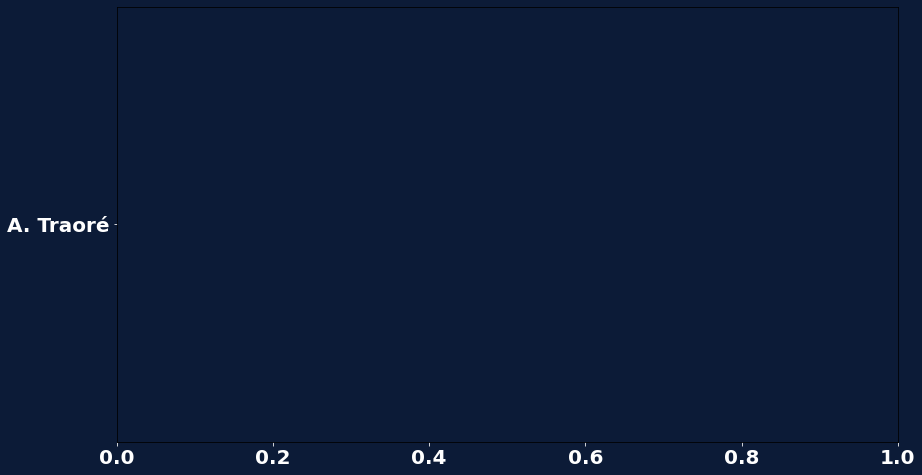

In [5]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
from adjustText import adjust_text
import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd
import numpy as np

### Subset the data ####
df2=pd.read_csv(r'C:\Users\Home\Documents\Player Aggregates/All_players.csv')
PR1=df2[['Player_Type', 'Player','Distance']].sort_values(by=['Distance'], ascending=[True]).reset_index(drop=True)


Player=PR1.Player
Distance=PR1.Distance
Distance_std=stats.sem(Distance)
x_pos = np.arange(len(Player))

### Headers and Sub-headers ###

Main_Header = "Av. Total Distance P90 (m)"

font0 = FontProperties()

csfont = {'fontfamily':'Montserrat'}
font0.set_family('Montserrat')

plt.rcParams['font.family'] = 'Montserrat'

text_color = "white"
Background = "#0C1B37"
Background_pop = "#80CBA2"
Featured= '#F6C243'
Target= '#EE7A6F'
Comp_benchmark="#5B9BCB"


plt.rcParams['xtick.color'] = text_color
plt.rcParams['ytick.color'] = text_color
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.titlepad'] = 70 


fig, ax = plt.subplots(figsize=(14,8))


fig.set_facecolor(Background)
ax.patch.set_alpha(0)


PR1.loc[PR1.Player_Type=='Benchmark','colors'] = Comp_benchmark
PR1.loc[PR1.Player_Type=='Featured','colors'] = Background_pop
PR1.loc[PR1.Player_Type=='Target','colors'] = Background_pop

PR1=PR1['colors'].notna()].reset_index(drop=True)

width = 0.45

# Create bars with different colors
ax.barh(Player,Distance,width,align='center',color=PR1.colors)

# Create names on the x-axis
#ax.yticks(x_pos, Player,color='w')

ax.grid(color='#7F7F7F', linestyle='-.', linewidth=0.7, axis='x',zorder=1)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)

Main_Header = "Av. Total Distance P90 (m)"
fig.text(0.30,0.98,Main_Header,fontweight="bold", fontsize=22,**csfont, color=text_color)


ax.set_title('Av. Total Distance P90 (m)',fontweight="bold", fontsize=22,**csfont, color=Background)

spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right",'bottom']:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)

        
        
Distance_1=max(Distance)+500

plt.margins(0.5, 0.1)
start, end = ax.get_xlim()

stepsize=500

ax.xaxis.set_ticks(np.arange(start, end, stepsize))
ax.set_xlim(8000, Distance_1)
ax.xaxis.tick_top()
# Show graph
plt.show()



In [7]:
PR1.colors.unique()

array([nan, '#5B9BCB', '#80CBA2'], dtype=object)

In [9]:
PR2=PR1[PR1['colors'].notna()].reset_index(drop=True)
print(len(PR1))
print(len(PR2))

612
2


In [10]:
PR2

Player_Type               Player     Distance   colors
0   Benchmark            FRA1 (FB)  9594.600292  #5B9BCB
1      Target  Y. Mosquera (20-21)  9901.601812  #80CBA2

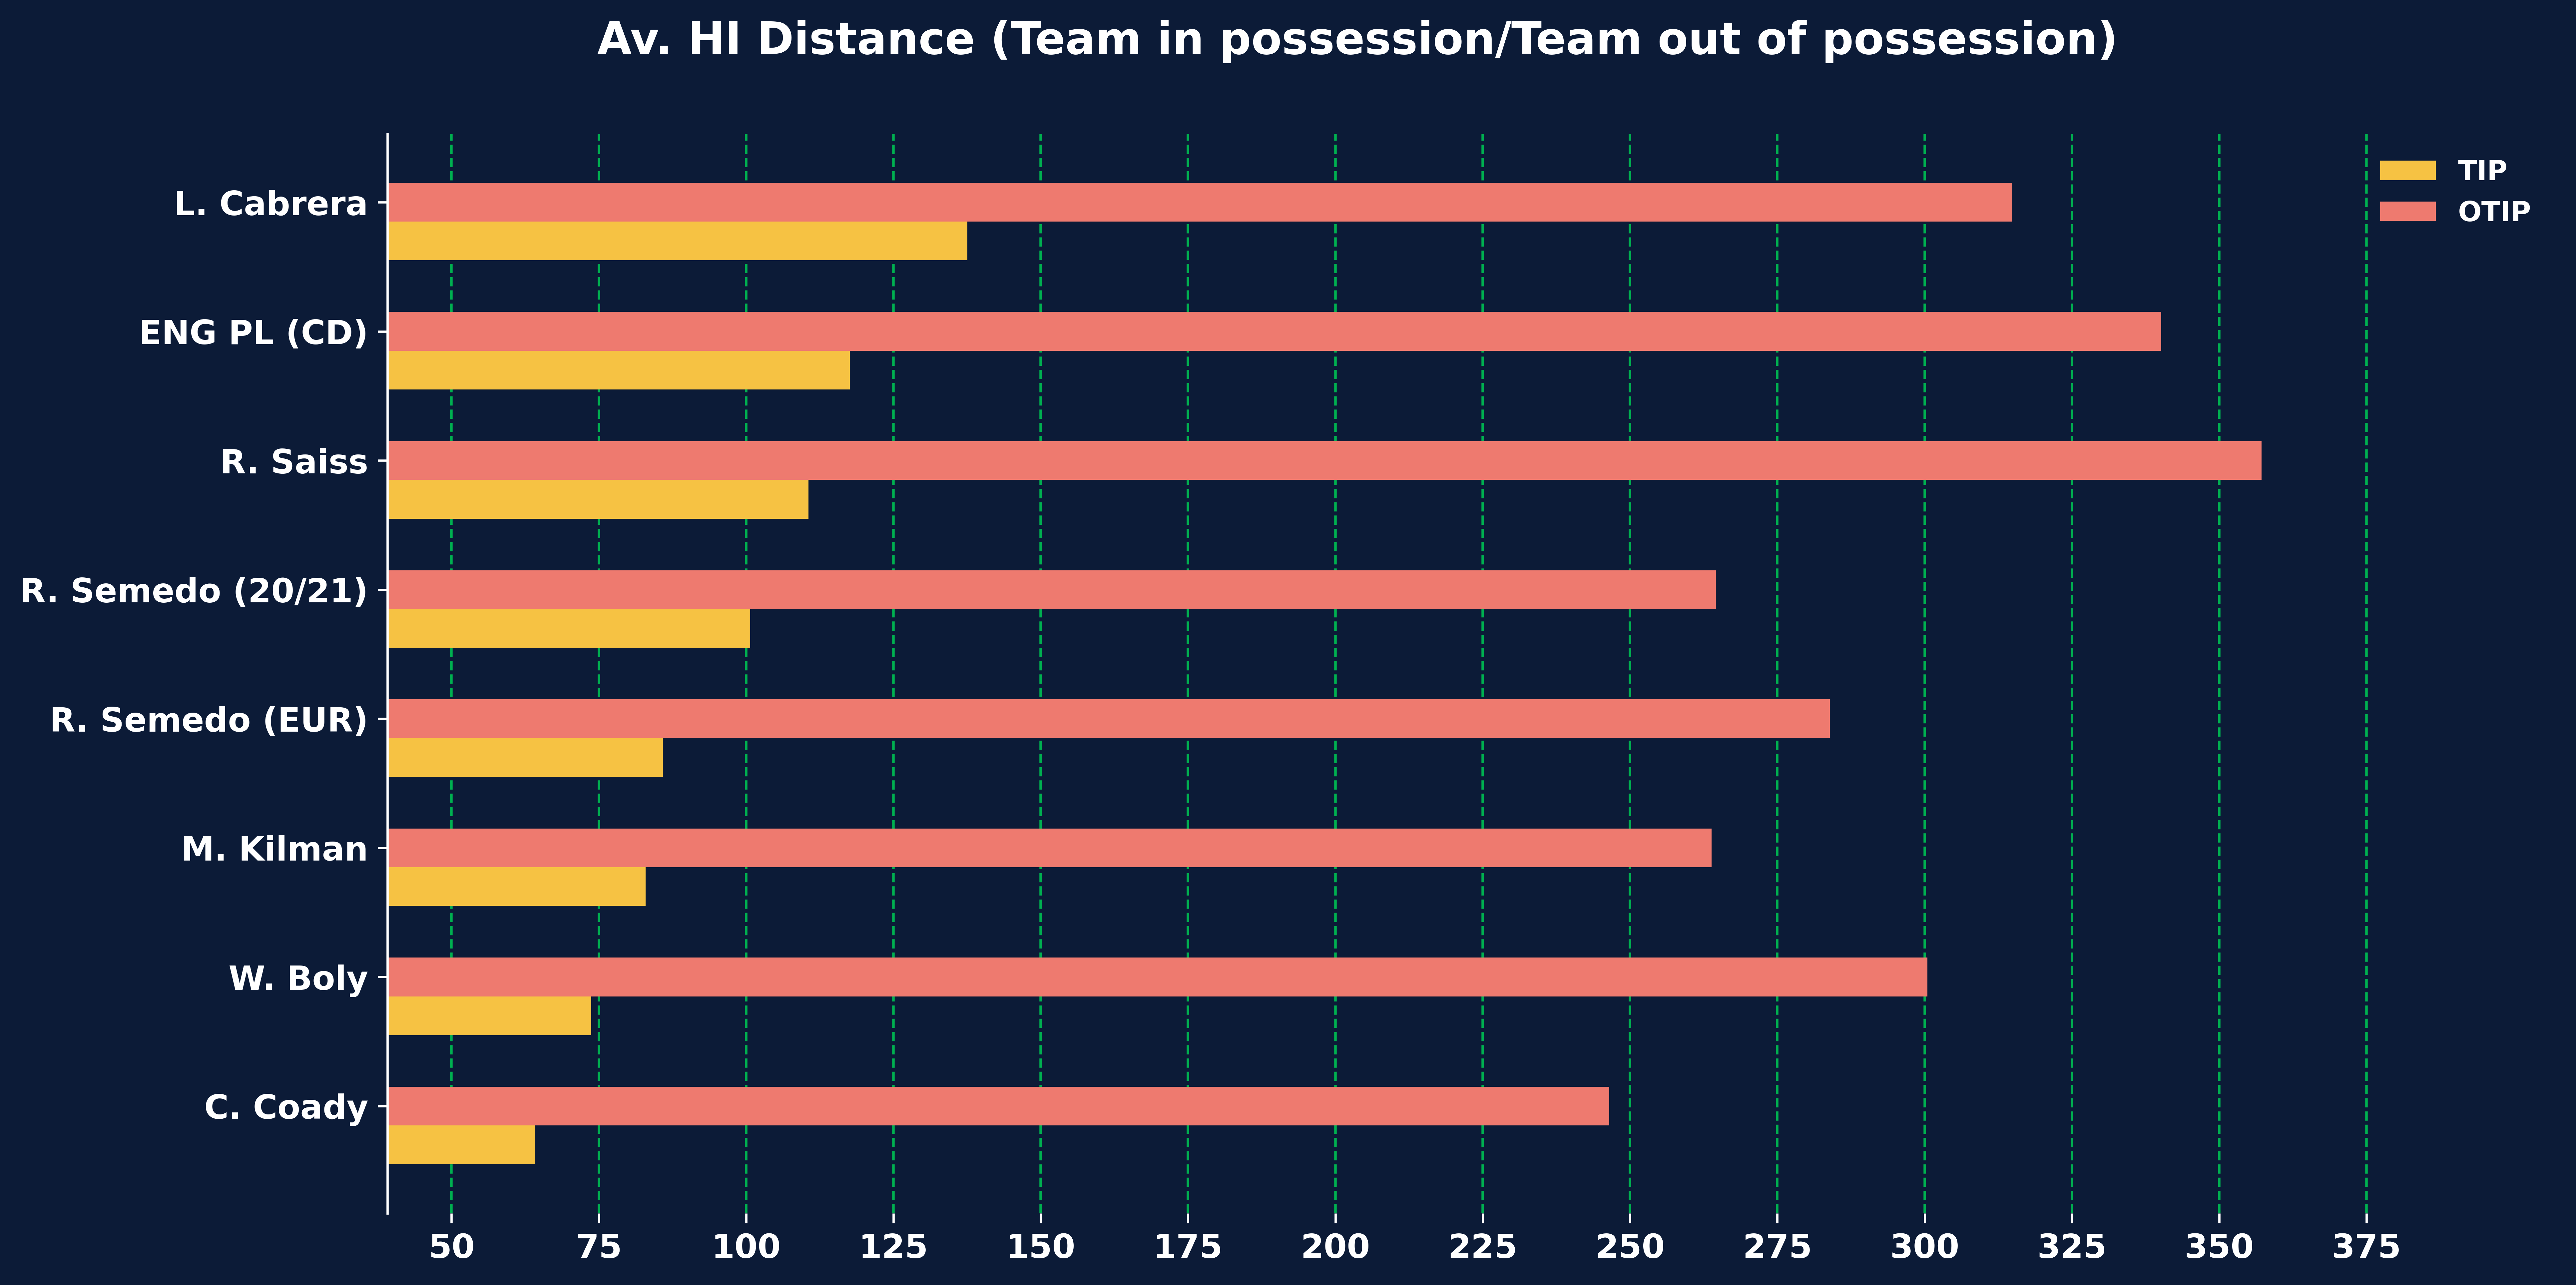

In [5]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
from adjustText import adjust_text
import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd
import numpy as np

Folder_Input=r'C:\Users\Home\Documents\Player Aggregates/'
### Subset the data ####
df2=pd.read_csv(Folder_Input+'All_players.csv')

PR1=df2[df2['Player_Type']!='Background Population'][['Player','HI Distance TIP','HI Distance OTIP']].sort_values(by=['HI Distance TIP'], ascending=[True]).reset_index(drop=True)
PR1.index=PR1.Player


a_vals = PR1['HI Distance TIP']
b_vals = PR1['HI Distance OTIP']
ind = np.arange(PR1.shape[0])

### Headers and Sub-headers ###

Main_Header = "Av. HI Distance (Team in possession/Team out of possession)"

font0 = FontProperties()

csfont = {'fontfamily':'Montserrat'}
#font0.set_family('Montserrat')
#plt.rcParams['font.family'] = 'Montserrat'

text_color = "white"
Background = "#0C1B37"
Background_pop = "#80CBA2"
Featured= '#F6C243'
Target= '#EE7A6F'
Comp_benchmark="#5B9BCB"


plt.rcParams['xtick.color'] = text_color
plt.rcParams['ytick.color'] = text_color
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.titlepad'] = 50 
plt.rcParams["legend.facecolor"]=Background
plt.rcParams["legend.edgecolor"]=Background



width = 0.30

# Create bars with different colors

def autolabel(bars):
    # attach some text labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width*0.95, bar.get_y() + bar.get_height()/2,
                '%d' % int(width),
                ha='right', va='center')

# make the plots
fig, ax = plt.subplots(figsize=(14,8),dpi=600)


fig.set_facecolor(Background)
ax.patch.set_alpha(0)
b = ax.barh(ind + width, b_vals, width, color = '#EE7A6F',zorder=2)  # plot b vals
a = ax.barh(ind, a_vals, width, color = '#F6C243',zorder=2) # plot a vals
ax.set_yticks(ind + width)  # position axis ticks
ax.set_yticklabels(PR1.index)  # set them to the names
ax.legend((a[0], b[0]), ['TIP', 'OTIP'], loc='upper right',labelcolor='white')


fig.text(0.20,0.85,Main_Header,fontweight="bold", fontsize=16,**csfont, color=text_color)
#ax.set_title("Av. HI Distance (Team in possession/Team out of possession)",fontweight="bold", fontsize=16,**csfont, color=Background)

spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right",'bottom']:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)


ax.grid(color='#00B050', linestyle='--', linewidth=0.9, axis='x',zorder=1)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)


start, end = ax.get_xlim()
stepsize=25

OTIP_min=min(PR1[['HI Distance TIP','HI Distance OTIP']].min(axis=1))-25
OTIP_max=max(PR1[['HI Distance TIP','HI Distance OTIP']].max(axis=1))+50

ax.xaxis.set_ticks(np.arange(start, end, stepsize))
ax.set_xlim(OTIP_min,OTIP_max)
#ax.xaxis.tick_top()
plt.subplots_adjust(top=0.8)
#Show graph
plt.show()



In [605]:
ind

array([0, 1, 2, 3, 4, 5, 6])

time: 2 ms


In [505]:
PR1

Player    MMin TIP   MMin OTIP
Player                                                              
Manchester United          Manchester United  129.234212  141.584849
Patrick Bamford              Patrick Bamford  129.301806  139.346545
Marcus Rashford              Marcus Rashford  129.765578  133.888861
UEFA Champions League  UEFA Champions League  131.404407  132.911137
UEFA Europa League        UEFA Europa League  131.404407  132.911137
Timo Werner                      Timo Werner  134.255811  143.343173
Islam Slimani                  Islam Slimani  135.613933  124.080801

time: 12.9 ms


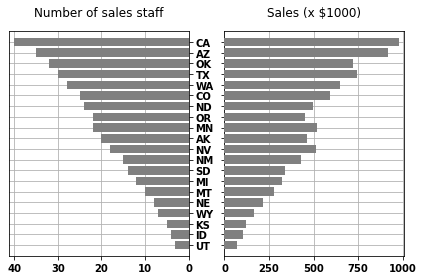

time: 501 ms


In [561]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams["font.weight"] = "bold"
plt.rcParams['axes.titlepad'] = 15 
plt.rcParams["legend.facecolor"]=Background
plt.rcParams["legend.edgecolor"]=Background

# Data
states = ["AK", "TX", "CA", "MT", "NM", "AZ", "NV", "CO", "OR", "WY", "MI",
          "MN", "UT", "ID", "KS", "NE", "SD", "WA", "ND", "OK"]
staff = np.array([20, 30, 40, 10, 15, 35, 18, 25, 22, 7, 12, 22, 3, 4, 5, 8,
                  14, 28, 24, 32])
sales = staff * (20 + 10 * np.random.random(staff.size))

# Sort by number of sales staff
idx = staff.argsort()
states, staff, sales = [np.take(x, idx) for x in [states, staff, sales]]

y = np.arange(sales.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, staff, align='center', color='gray', zorder=10)
axes[0].set(title='Number of sales staff')
axes[1].barh(y, sales, align='center', color='gray', zorder=10)
axes[1].set(title='Sales (x $1000)')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.2)
plt.show()

In [123]:
check=A[['Player','Minutes']]
check

Player  Minutes
55423        Daniel James     5.15
55451   Donny van de Beek    15.80
55453     Anthony Martial    90.17
55454     Anthony Martial    94.32
55455     Anthony Martial    94.75
55474     Marcus Rashford    96.20
55930      Edinson Cavani    12.05
55931      Edinson Cavani    34.02
55932      Edinson Cavani    95.15
55933      Edinson Cavani    79.00
187100    Marcus Rashford    68.35
187122    Mason Greenwood    91.33
187123    Mason Greenwood    95.38
187124    Mason Greenwood    86.14
187128    Anthony Martial    26.97
187129    Anthony Martial    94.40
187316     Edinson Cavani    28.88
206885  Donny van de Beek     6.93
206899    Anthony Martial   100.42
206900    Anthony Martial    91.76
206901    Anthony Martial    28.22
206902    Anthony Martial    85.41
206903    Anthony Martial    95.34
206905    Anthony Martial    18.83
206906    Anthony Martial    91.58
206907    Anthony Martial    95.22
206908    Anthony Martial    76.04
206910    Anthony Martial    97.33
206912    Anthony Martial    97.62
206914    Anthony Martial    48.00
206918    Anthony Martial    71.37
206919    Anthony Martial    15.37
206920    Anthony Martial    88.10
206977    Marcus Rashford    99.86
206978    Marcus Rashford    95.21
206983    Marcus Rashford    49.95
206984    Marcus Rashford    94.03
206996    Marcus Rashford    94.42
207004    Marcus Rashford    84.43
207112    Mason Greenwood    23.57
207113    Mason Greenwood    79.47
207115    Mason Greenwood    95.10
210023     Edinson Cavani    36.25
210025     Edinson Cavani    15.03
210027     Edinson Cavani    32.47
210028     Edinson Cavani    46.13
210030     Edinson Cavani    19.13
210031     Edinson Cavani    97.45
210032     Edinson Cavani   101.42
210033     Edinson Cavani    28.93
210034     Edinson Cavani    97.35
210035     Edinson Cavani    47.50
210037     Edinson Cavani    97.14
210038     Edinson Cavani    97.00
210039     Edinson Cavani    33.23
210040     Edinson Cavani    97.56
210041     Edinson Cavani    82.77
210042     Edinson Cavani    99.14
210043     Edinson Cavani    48.90

time: 11 ms


In [ ]:
#### Check Match Count ####
Match_count=Primary_1['Match'].value_counts().sum()

Primary_1 = Primary_1[cols]

Primary_1 = Primary_1.groupby('Player').mean()

def PEC (a, b):
    return a*90/ b


Primary_1 = Primary_1.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
Primary_1['Count_Match']=Match_count
Primary_1.reset_index(level='Player', inplace = True)
Primary_1['Type_Pl']='Target'
Primary_1

In [32]:
print(type(cond_a))

<class 'pandas.core.series.Series'>
time: 1.3 ms


In [33]:
#### Primary Players ####

#### Primary _2
primary_2 = ["Joakim Nilsson"]
prim_pos_2= []
prim_lg_2=['SWE Allsvenskan']
prim_seasn_2=[]
prim_posgrp_2= []
prim_team_2=[]


cond_a = All_leagues_Players['Player'].isin(primary_2)   
cond_b = All_leagues_Players['Position'].isin(prim_pos_2)
cond_c = All_leagues_Players['League'].isin(prim_lg_2)
cond_d = All_leagues_Players['Season'].isin(prim_seasn_2)
cond_e = All_leagues_Players['Position Group'].isin(prim_posgrp_2)
cond_f = All_leagues_Players['Team'].isin(prim_team_2)

Prim_condition_2=cond_a & cond_c

Primary_2 = All_leagues_Players[Prim_condition_2]


cols = ['Player','Minutes', 'Distance', 'Running Distance', 'HSR Distance',
       'Sprinting Distance', 'Count HSR', 'Count Sprint', 'Count Acceleration',
       'Count Deceleration', 'PSV-99', 'Minutes TIP', 'Distance TIP',
       'Running Distance TIP', 'HSR Distance TIP', 'Sprinting Distance TIP',
       'Count HSR TIP', 'Count Sprint TIP', 'Count Acceleration TIP',
       'Count Deceleration TIP', 'Minutes OTIP', 'Distance OTIP',
       'Running Distance OTIP', 'HSR Distance OTIP', 'Sprinting Distance OTIP',
       'Count HSR OTIP', 'Count Sprint OTIP', 'Count Acceleration OTIP',
       'Count Deceleration OTIP']

#### Check Match Count ####
Match_count=Primary_2['Match'].value_counts().sum()

Primary_2 = Primary_2[cols]

Primary_2 = Primary_2.groupby('Player').mean()

def PEC (a, b):
    return a*90/ b


Primary_2 = Primary_2.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
Primary_2['Count_Match']=Match_count
Primary_2.reset_index(level='Player', inplace = True)
Primary_2['Type_Pl']='Target'
Primary_2

Player  Minutes     Distance  Running Distance  HSR Distance  \
0  Joakim Nilsson     90.0  9994.403194       1530.316965    471.612194   

   Sprinting Distance  Count HSR  Count Sprint  Count Acceleration  \
0          116.287938  40.074923      7.570829          104.477445   

   Count Deceleration  ...  Distance OTIP  Running Distance OTIP  \
0          101.247224  ...    4817.974831             873.774647   

   HSR Distance OTIP  Sprinting Distance OTIP  Count HSR OTIP  \
0          317.26822                82.572512       27.759707   

   Count Sprint OTIP  Count Acceleration OTIP  Count Deceleration OTIP  \
0           4.239664                  42.2957                50.169362   

   Count_Match  Type_Pl  
0           10   Target  

[1 rows x 31 columns]

time: 236 ms


In [37]:
#### Primary Players ####

All=pd.read_csv(r'C:\Users\Home\Documents\All.csv')


#### Primary _2
primary_2 = ["KAKAKA"]
prim_pos_2= []
prim_lg_2=['']
prim_seasn_2=['20-21']
prim_posgrp_2= ['AA']
prim_team_2=[]


cond_a = All['Player'].isin(primary_2)   
cond_b = All['Position'].isin(prim_pos_2)
cond_c = All['League'].isin(prim_lg_2)
cond_d = All['Season'].isin(prim_seasn_2)
cond_e = All['Position Group'].isin(prim_posgrp_2)
cond_f = All['Team'].isin(prim_team_2)

#### The below condition works well as the conditions are present ###
Prim_condition_2=cond_a & cond_c

#### How can I get the below condition to work? No matter if there are options entered in or not?

Prim_condition_2=cond_a & cond_c & cond_b & cond_d & cond_e & cond_f

Primary_2 = All[Prim_condition_2]

time: 21.5 ms


In [34]:
All_leagues_Players.to_csv(r'C:\Users\Home\Documents\All_leagues_Players.csv')

KeyboardInterrupt: 

time: 14.2 s


In [ ]:


cols = ['Player','Minutes', 'Distance', 'Running Distance', 'HSR Distance',
       'Sprinting Distance', 'Count HSR', 'Count Sprint', 'Count Acceleration',
       'Count Deceleration', 'PSV-99', 'Minutes TIP', 'Distance TIP',
       'Running Distance TIP', 'HSR Distance TIP', 'Sprinting Distance TIP',
       'Count HSR TIP', 'Count Sprint TIP', 'Count Acceleration TIP',
       'Count Deceleration TIP', 'Minutes OTIP', 'Distance OTIP',
       'Running Distance OTIP', 'HSR Distance OTIP', 'Sprinting Distance OTIP',
       'Count HSR OTIP', 'Count Sprint OTIP', 'Count Acceleration OTIP',
       'Count Deceleration OTIP']

#### Check Match Count ####
Match_count=Primary_2['Match'].value_counts().sum()

Primary_2 = Primary_2[cols]

Primary_2 = Primary_2.groupby('Player').mean()

def PEC (a, b):
    return a*90/ b


Primary_2 = Primary_2.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
Primary_2['Count_Match']=Match_count
Primary_2.reset_index(level='Player', inplace = True)
Primary_2['Type_Pl']='Target'
Primary_2

In [ ]:
#### Primary _2
primary_2 = ["Joakim Nilsson"]
prim_pos_2= []
prim_lg_2=['SWE Allsvenskan']
prim_seasn_2=[]
prim_posgrp_2= []
prim_team_2=[]


cond_a = All_leagues_Players['Player'].isin(primary_2)   
cond_b = All_leagues_Players['Position'].isin(prim_pos_2)
cond_c = All_leagues_Players['League'].isin(prim_lg_2)
cond_d = All_leagues_Players['Season'].isin(prim_seasn_2)
cond_e = All_leagues_Players['Position Group'].isin(prim_posgrp_2)
cond_f = All_leagues_Players['Team'].isin(prim_team_2)

In [29]:
a=list(cond_a[cond_a==True].index)
b=list(cond_b[cond_b==True].index)
c=list(cond_c[cond_c==True].index)
a.append(0)
a

[10875,
 10876,
 10877,
 10878,
 10879,
 10880,
 10881,
 10882,
 10883,
 10884,
 152805,
 152806,
 152807,
 152808,
 152809,
 152810,
 152811,
 152812,
 152813,
 152814,
 152815,
 152816,
 152817,
 152818,
 152819,
 152820,
 152821,
 152822,
 152823,
 152824,
 275869,
 275870,
 275871,
 275872,
 275873,
 275874,
 275875,
 275876,
 275877,
 275878,
 275879,
 275880,
 275881,
 275882,
 275883,
 275884,
 275885,
 275886,
 275888,
 275889,
 275890,
 275891,
 275892,
 275893,
 275894,
 275895,
 275896,
 0]

time: 33 ms


In [20]:
b=cond_b[cond_b==True].index
b

Int64Index([], dtype='int64')

time: 9.69 ms


In [22]:
c=cond_a|cond_b
c

0         False
1         False
2         False
3         False
4         False
          ...  
348193    False
348194    False
348195    False
348196    False
348197    False
Length: 348198, dtype: bool

time: 8.67 ms
